<img src="https://www.cems.uwe.ac.uk/~pa-legg/uwecyber/images/uwe.png" width=300>
<img src="https://www.cems.uwe.ac.uk/~pa-legg/uwecyber/images/uwecyber_acecse_200.jpg" width=300>

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Task 4: Fake News Classification (2021)
---

The completion of this worksheet is worth **30%** towards your portfolio for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Task
***

In this task, you will need to develop a system that can perform text analytics to classify news articles as either being fake news or true. You should look to use the ***ski-kit learn*** Python library as part of your work - you will find it useful to conduct research and to examine the user guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html). 

The provided dataset has two csv files: one contains 23481 fake news articles, the other contains 21417 true news articles. The data consists of the following columns: title (contains news headlines), text (contains news content/article), subject (type of news), and date (date the news was published).

You will need to consider how to pre-process the data so that it is suitable for further analysis and for use with a machine learning classifier. This will include how the data is structured, how the output class is denoted, any cleansing of the text that may be required (e.g., removal of stopwords, stemming, n-grams).

You should then show how you can deploy 3 different ML classifiers on the data, using the scikit-learn library to achieve this. As an example, you may choose the following 3 algorithms (or you may explore suitable alternatives):

- logreg_cv = LogisticRegression(random_state=0)
- dt_cv=DecisionTreeClassifier()
- nb_cv=MultinomialNB(alpha=0.1) 

You should make use of visualisation to illustrate the distinguishing characteristics of the dataset classes, including the news categories and the top 20 n-grams of the data in each respective class.

You will need to describe the analytical process you have taken using Markdown, and you will need to report your overall final accuracy for the classifier.

### Assessment and Marking
***

| Criteria | 0-39 | 40-49 | 50-59 | 60-69 | 70-84 | 85-100 |
| --- | --- | --- | --- | --- | --- | --- |
| **Suitable use of text pre-processing (30%)** | No evidence of progress | A limited attempt to address this criteria | A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Use of 3 Machine Learning classifiers and reporting their performance (30%)**  | No evidence of progress | A limited attempt to address this criteria |  A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Visualisation techniques to understand the pre-processing and classification stages (20%)**  | No evidence of progress | A limited attempt to address this criteria |  A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Clarity and professional presentation (20%)**  | No evidence of progress | A limited attempt to address this criteria | Some evidence of markdown commentary | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |

You will need to implement your final solution in the Notebook format, with Markdown annotation -  you should use this notebook file as a template for your submission. You are also expected to complete the assignment self-assessment.

Your submission should include:
- HTML export of your complete assignment in notebook format.
- Original ipynb source file of your notebook.

### Self-Assessment
---

For each criteria, please reflect on the marking rubric and indicate what grade you would expect to receive for the work that you are submitting. For your own personal development and learning, it is important to reflect on your work and to attempt to assess this careful. Do think carefully about both positive aspects of your work, as well as any limitations you may have faced.

- **Suitable use of text pre-processing (30%)**: You estimate that your grade will be 100.

- **Use of 3 Machine Learning classifiers and reporting their performance (30%)**: You estimate that your grade will be 100.

- **Visualisation techniques to understand the pre-processing and classification stages (20%)**: You estimate that your grade will be 80.

- **Clarity and professional presentation (20%)**: You estimate that your grade will be 80.

Please provide a minimum of two sentences to comment and reflect on your own self-assessment: This task was interesting as it required a lot of research before starting the task, then once the research stage was completed, the  text pre-processing and fitting the classifiers was quite quick. The time then sank into improving the visualisation, there were not many resources available and so I found it challenging to create many visualisations.


### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---

In [1]:
#!pip3 install pandas numpy matplotlib seaborn wordcloud sklearn nltk
#Basic libraries
import pandas as pd 
import numpy as np 
#nltk libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk import ngrams
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#scikit learn libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.metrics import RocCurveDisplay
#Visualization libraries
import matplotlib.pyplot as plt
#Miscellanous libraries
from collections import Counter
from wordcloud import WordCloud , STOPWORDS
import csv
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


## Loading the data


In [2]:
#Reading the fake and true datasets
fake_news = pd.read_csv('./T4_data/Fake.csv')
true_news = pd.read_csv('./T4_data/True.csv')

#  Text Pre-Processing

In [3]:
def process(data_set):
    # Stem words
    stemmer = SnowballStemmer("english") #Select the English stemmer to remove word endings
    data_set['processed'] = (data_set['text'].str.split().apply(lambda x: [stemmer.stem(y) for y in x])).str.join(" ") #Tokenise the words, stem them, then rejoin into an article
    #Remove Stop words
    stop_words = set(stopwords.words('english')) #Select the English stop words to be removed.
    cleaned = []
    stop =[]
    for row in data_set['processed']: #Loop through the data set
        cleaned = []
        word_tokens = word_tokenize(row)     #Tokenise the words
        for w in word_tokens:                #Check for single words
            if w not in stop_words:          #If the word is not a stop word
                if len(w) >3:                #Or shorter than 2 characters
                    cleaned.append(w)        #Keep the word, otherwise discard the word
        stop.append(" ".join(cleaned))       #Append all these words for an article
    data_set['processed'] = stop             #Append all articles into the dataset
    return data_set

# Remove publisher information
noPub = []
for row in true_news['text']:                    #Loop through the true news dataset
    noPub.append(" ".join(row.split(' - ')[1:])) #Split the data up by "-", ignore the first slice and rejoin the remaining
true_news['text'] = noPub                        #Append to true news text

# Process each set of data to stem and remove stop words
true_news = process(true_news)    #Call process to sanitise the data
fake_news = process(fake_news)    #Call process to sanitise the data

# Merge the data frames and keep track of true/false data in t_or_f
t_or_f = []
for row in fake_news['title']:
    t_or_f.append(0)                #Keep track of fake news, give this a status of 0
fake_news['t_or_f'] = t_or_f
t_or_f = []
for row in true_news['title']:
    t_or_f.append(1)                #Keep track of true news, give this a status of 1
true_news['t_or_f'] = t_or_f
merged = fake_news                  #Merge the two sanitised datasets into one table
merged = merged.append(true_news)
merged.reset_index(drop=True,inplace=True) # Re-number the new data set or it would repeat 1-5000 twice.
merged

,title,text,subject,date,processed,t_or_f
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",donald trump wish american happi year leav ins...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",hous intellig committe chairman devin nune ass...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",friday reveal former milwauke sheriff david cl...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",christma donald trump announc would back work ...,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",pope franci annual christma messag rebuk donal...,0
...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017",nato alli tuesday welcom presid donald trump d...,1
44894,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017",lexisnexis provid legal regulatori busi inform...,1
44895,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017",shadow disus soviet-era factori minsk street l...,1
44896,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017",vatican secretari state cardin pietro parolin ...,1


# Pre-processing Data

In [4]:
#Create N-Grams for a dataset
def ngrammer(data,ngramSize):
    words = data['processed'].str.split() #Extract all words 
    grams =[]
    for row in words:                     #Loop through all the articles
        article = ngrams(row,ngramSize)   #Split the article into n-grams of specified size
        for gram in article:              #N-gram function returns a zip object
            grams.append(gram)            #Extract from zip object into an array
    return grams

true_grams_series = (pd.Series(ngrammer(true_news,4)).value_counts())[:20] #Create a series to be plotted, take top 15
fake_grams_series = (pd.Series(ngrammer(fake_news,4)).value_counts())[:20] #Create a series to be plotted, take top 15

#Count the number of occurances of a word within a dataset
def count_occur(data):
    count=Counter()
    for row in data['processed']:        #Loop through the data set
        word_tokens = word_tokenize(row) #Tokenise the words
        for word in word_tokens:
            count[word] +=1              #Increment the counter with word occurences
    return count
true_count =count_occur(true_news)
fake_count =count_occur(fake_news)
true_labels, true_values = zip(*true_count.most_common(30)) #Top 30 commonly used true words, give to label and value
true_indexes = np.arange(len(true_labels))                  #Set indexes to length of true labels
fake_labels, fake_values = zip(*fake_count.most_common(30)) #Top 30 commonly used true words, give to label and value
fake_indexes = np.arange(len(fake_labels))                  #Set indexes to length of true labels

#Word Clouds
stopwords = set(STOPWORDS)
stopwords.update(["said"])                               # "Said" has not been removed by previous text processing
words = " ".join(true_labels)                            # The most common true words are joined
trueCloud = WordCloud(stopwords=stopwords,width=1280, height=853, margin=0, # Create a word cloud on the true words
                      colormap='Blues').generate(words)
words = " ".join(fake_labels)                            # The most common true words are joined
fakeCloud = WordCloud(stopwords=stopwords,width=1280, height=853, margin=0, # Create a word cloud on the true words
                      colormap='Reds').generate(words)

# Splitting the data and training the classifiers

In [5]:
merged_x = merged['processed'] #Select columns from total dataset for x classifier
merged_y = merged['t_or_f']    #Select columns from total dataset for y classifier
x_train, x_test, y_train, y_test= train_test_split(merged_x, merged_y,test_size=0.2, random_state=4) # Split the data into 80% training, 20% testing sets
tfidf = TfidfVectorizer(min_df=1,stop_words='english') #Initialise the vectoriser with English stop words to catch any remaining words.
x_train_tfidf = tfidf.fit_transform(x_train) # Transform x_train data into more expressive numerical values
x_test_tfidf = tfidf.transform(x_test)       # Transform y_train data into more expressive numerical values
#MNB
mnb = MultinomialNB()
mnb.fit(x_train_tfidf,y_train)    #Train the MNB classifier with x/y train
#LogReg
logReg = LogisticRegression()
logReg.fit(x_train_tfidf,y_train) #Train the Logistic Regression classifier with x/y train
#DecTree
decTree = DecisionTreeClassifier()
decTree.fit(x_train_tfidf,y_train)#Train the Decision Tree classifier with x/y train

DecisionTreeClassifier()

# Multinomial NB

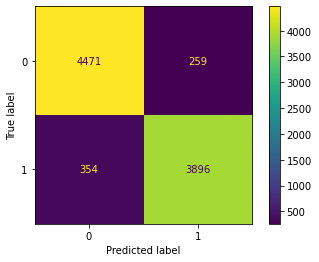

In [6]:
mnbplot = plot_confusion_matrix(mnb, x_test_tfidf,y_test)

# Logistic Regression

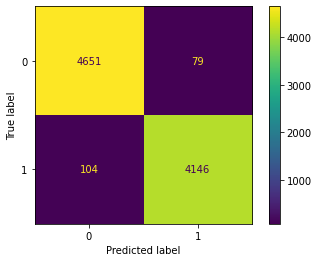

In [7]:
logRegPlot=plot_confusion_matrix(logReg, x_test_tfidf,y_test)

# Decision Tree

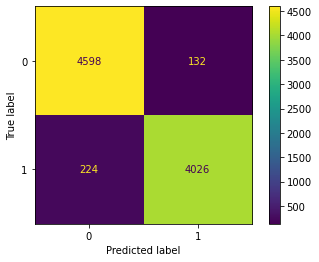

In [8]:
decTreePlot=plot_confusion_matrix(decTree, x_test_tfidf,y_test)

These confusion matrices display the accuracy of the classifiers, it shows this with the true positive top left, true negative top right, false negative bottom left and false positive bottom right. As can be seen with the head maps,all three classifiers provide a very low set of negative results with their true positives being their most accurate classification.

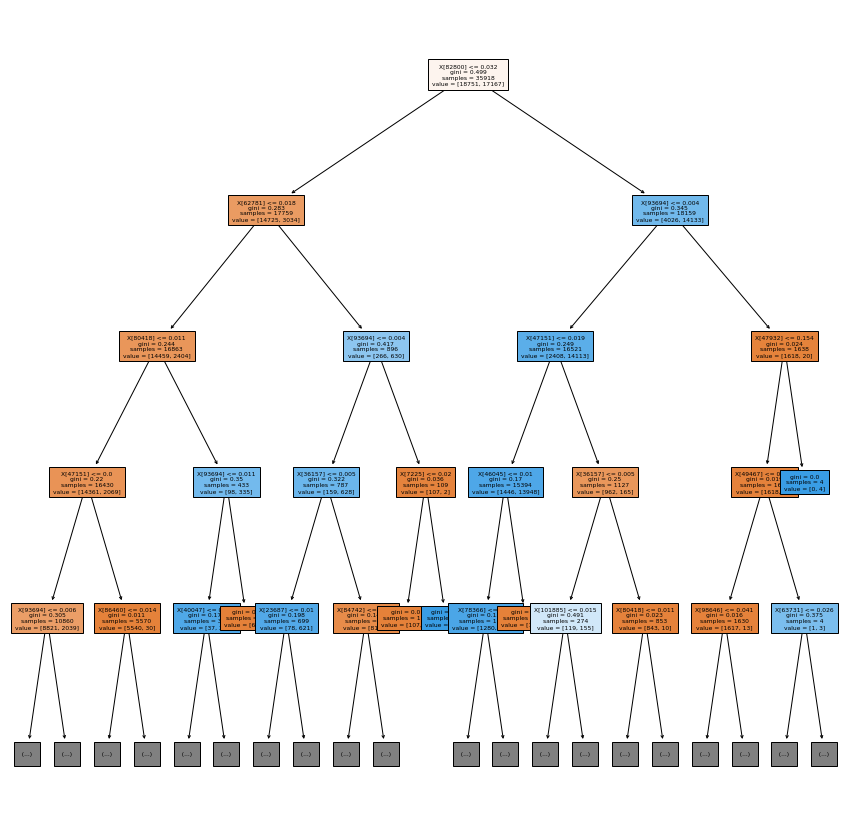

In [9]:
treeFig = plt.figure(figsize=(15,15))
figTree = tree.plot_tree(decTree, max_depth=4,filled=True,fontsize=6)

This is a visualisation of the decision tree, the depth was limited due to the inability to distinguish nodes. The gini is the tree's confidence in classifying a piece of data. If the gini is 0 then there is complete confidence and the branch ends. Otherwise, continue building the branches out until this value is met. This can be seen on the right side of the tree at depth 3, a branch has been ended.

# Comparing the Classifiers

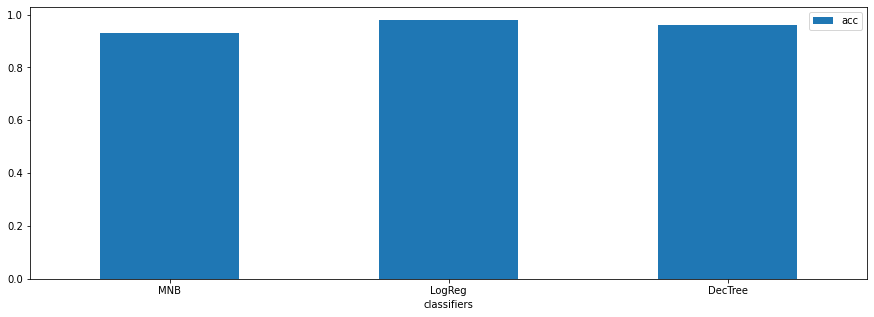

In [10]:
allScores = pd.DataFrame({'classifiers':['MNB','LogReg','DecTree'],'acc':[mnb.score(x_test_tfidf,y_test),logReg.score(x_test_tfidf,y_test),decTree.score(x_test_tfidf,y_test)]})
allScoresPlot=allScores.plot(kind="bar", x='classifiers',y='acc',rot=0,figsize=(15,5))

This bar chart shows a comparison between the three classifiers, as can be seen, Logisitic Regression is the best classifier scoring 97.9% accuracy, below this is the decision tree at 95.8% while MultinomialNB is at 93.1%.
### Roc Curve

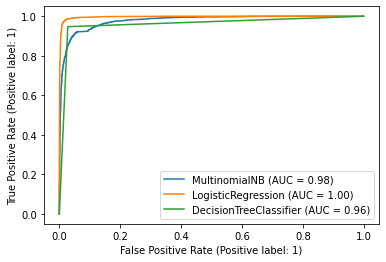

In [11]:
mnbCurve= RocCurveDisplay.from_estimator(mnb, x_test_tfidf,y_test)
ax= plt.gca()
mnbLogCurve= RocCurveDisplay.from_estimator(logReg, x_test_tfidf,y_test,ax=ax)
mnbLogDecCurve= RocCurveDisplay.from_estimator(decTree, x_test_tfidf,y_test,ax=ax)

The Roc curve is another visualisation of all three of the classifiers and their accuracy predictions. This shows that the roc curve prediction displays Logistic regression being the most accuracy, however, MNB is at 98% within this prediction function.  

# Word Occurences

The classifiers function based upon the occurences of words.

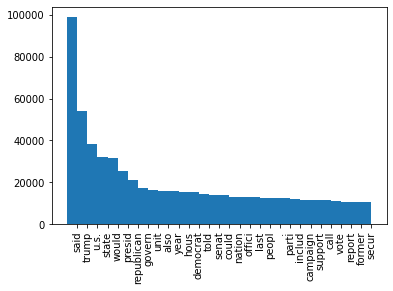

In [12]:
plt.bar(true_indexes, true_values, 1)
plt.xticks(true_indexes + 0.5, true_labels, rotation=90)
plt.show()

As can be seen, "said" is the most common word in the true words articles, this is followed by "trump"

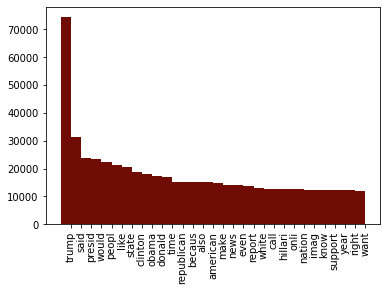

In [13]:
plt.bar(fake_indexes, fake_values, 1,color="#710C04")
plt.xticks(fake_indexes + 0.5, fake_labels, rotation=90)
plt.show()

In the case of fake news, "trump" is the most common word.

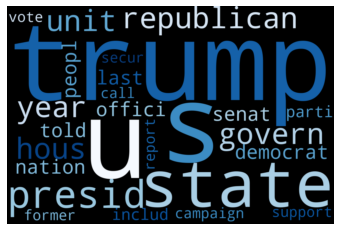

In [14]:
plt.imshow(trueCloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

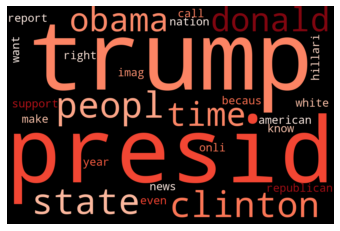

In [15]:
fakePlot=plt.imshow(fakeCloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

These two wordclouds are a more visual representation of the previous two bar charts, in particular, the word "said" was removed as this was not taken out by previous stop words. This graph is limited by the word length, longer words will inheritly appear larger, even if they have the same frequency.

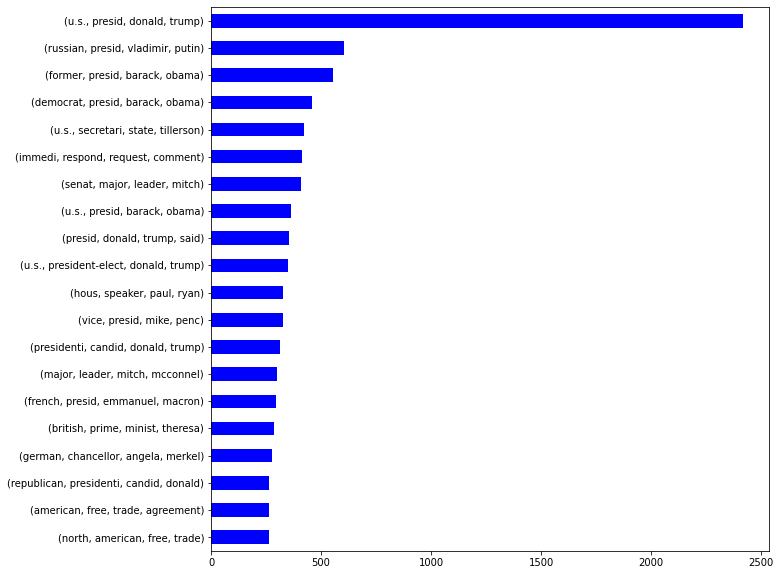

In [16]:
trueGrams=true_grams_series.sort_values().plot.barh(color='blue', figsize=(10, 10))

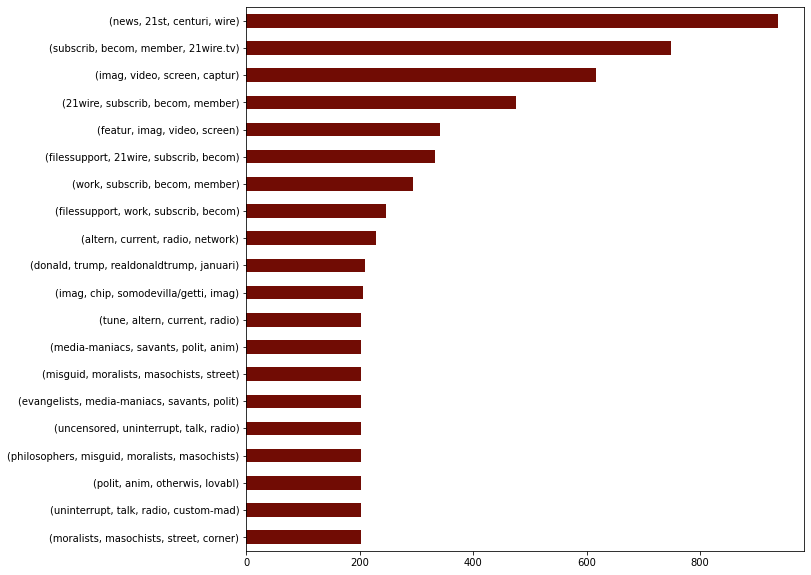

In [17]:
fakeGrams=fake_grams_series.sort_values().plot.barh(color='#710C04', figsize=(10, 10))

N-grams are a more accurate representation of the words, this is because, by clumping the words together, they gain context. In the true news n-grams, it can be seen that "u.s president donald trump" is by far the most commonly occuring n-gram. In contrast, the fake news is much tighter in grouping, these articles focus largely on subscriptions and trying to make people become members of their platform rather than displaying the news.

# Summary

My results show that within these three classifiers,Logisitic Regression is the best for handling
true vs fake news. The confusion matricies show that Logisitic Regression gets approximately a third of the negative results to the other two classifiers. The depth of the decision tree is extreme, this is likely to mean that the classifier is overfitted to the data, if transfering this to a new dataset, the classifier would be considerably more inaccurate. 
By looking at specific word occurences and n-grams, it can be seen that while there are different words which have high frequency, both datasets have a word/n-gram which is far ahead of the remaining data within the set.